#Chapter 5 When and how to use Artificial Intelligence

Chapter programs adapted by Carlos Toxtli

Source: https://github.com/PacktPublishing/Artificial-Intelligence-By-Example-Second-Edition/tree/master/CH05


Upload the data.csv file that is on GitHub to your Google Drive Account. Then use the share option to copy a link to the file. Then, on line 2, type "!gdown", space, and copy your shareable link. Make sure that that "uc?" comes before "id=". If not insert "uc?" as in the example on line 1. Then you can execute the notebook.

In [0]:
#!gdown  https://drive.google.com/uc?id=1-1RE8gazEQxqsdfmkenfmeiksnedik
#!gdown [your shareable link here]

Random sample

4999
   Distance  location
0        80        53
1        18         8
2        55        38
3        74        74
4        17         4
      Distance  location
0           80        53
1           18         8
2           55        38
3           74        74
4           17         4
...        ...       ...
4994        26        28
4995        50        91
4996        19        32
4997        73        95
4998        36        64

[4999 rows x 2 columns]
The geometric centers or centroids:
[[49.08333333 84.52083333]
 [29.26       52.76      ]
 [97.25657895 83.5       ]
 [21.60571429 15.64571429]
 [48.95897436 23.6       ]
 [67.11413043 54.76630435]]


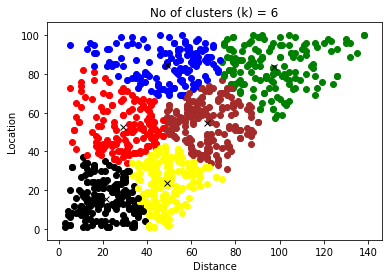

The predictions:
[1 1 2 5 1 5]


'\nOutput of the cluster number of each example\n[3 3 2 3 3 4]\n'

In [0]:
#K-means clustering with Mini-Batch
#Build with Sklearn
#Copyright 2018 Denis Rothman MIT License. See LICENSE.
from sklearn.cluster import KMeans  
import pandas as pd
from matplotlib import pyplot as plt
from random import randint
import numpy as np

#I.The training Dataset 
dataset = pd.read_csv('data.csv')
print(len(dataset))
print(dataset.head())
print(dataset)
'''Output of print(dataset)
      Distance  location
0           80        53
1           18         8
2           55        38
...
'''

n=1000
dataset1=np.zeros(shape=(n,2))

li=0
for i in range (n):
    j=randint(0,4998)
    dataset1[i][0]=dataset.iloc[j,0]
    dataset1[i][1]=dataset.iloc[j,1]
    

#II.Hyperparameters
# Features = 2 :implict through the shape of the dataset (2 columns)
k = 6
kmeans = KMeans(n_clusters=k)

#III.K-means clustering algorithm
kmeans = kmeans.fit(dataset1)        #Computing k-means clustering
gcenters = kmeans.cluster_centers_   # the geometric centers or centroids
print("The geometric centers or centroids:")
print(gcenters)

'''Ouput of centroid coordinates

The geometric centers or centroids:

Monte Carlo philosophy:

MC[[ 19.7877095   16.40782123]
  [ 21.38965517  15.04597701]]

MC [ 99.87603306  81.1322314 ]
   [ 96.06151645  84.57939914]

MC[ 31.29139073  72.64900662]]
  [ 32.12590799  54.84866828]

MC [ 61.54891304  49.875     ]
   [ 68.84578885  55.63226572]


MC [ 63.86206897  84.20689655]
   [ 45.24736842  23.65263158]


Complete dataset:

[[ 48.7986755   85.76688742]
 [ 48.44532803  24.4333996 ]
'''


#IV.Defining the Result labels 
labels = kmeans.labels_
colors = ['blue','red','green','black','yellow','brown','orange']


#V.Displaying the results : datapoints and clusters
y = 0
for x in labels:
    plt.scatter(dataset1[y,0], dataset1[y,1],color=colors[x])
    y+=1       
for x in range(k):
    lines = plt.plot(gcenters[x,0],gcenters[x,1],'kx')    

title = ('No of clusters (k) = {}').format(k)
plt.title(title)
plt.xlabel('Distance')
plt.ylabel('Location')
plt.show()

#VI.Test dataset and prediction
x_test = [[40.0,67],[20.0,61],[90.0,90],
          [50.0,54],[20.0,80],[90.0,60]]
prediction = kmeans.predict(x_test)
print("The predictions:")
print (prediction)
'''
Output of the cluster number of each example
[3 3 2 3 3 4]
'''



Batch shuffling

   Distance  location
0        80        53
1        18         8
2        55        38
3        74        74
4        17         4
initial order
      Distance  location
0           80        53
1           18         8
2           55        38
3           74        74
4           17         4
...        ...       ...
4994        26        28
4995        50        91
4996        19        32
4997        73        95
4998        36        64

[4999 rows x 2 columns]
shuffled
      Distance  location
1552        39        14
658        125        89
1763        35        51
2272        60        40
1404        28        98
...        ...       ...
153         31        66
866         66        45
2790        59        70
74          60        78
338         20         2

[4999 rows x 2 columns]
shuffled selection
[[ 39.  14.]
 [125.  89.]
 [ 35.  51.]
 ...
 [ 35.  54.]
 [ 60.  78.]
 [ 48.  82.]]
The geometric centers or centroids:
[[20.11842105 13.86842105]
 [99.67857143 84.90714286]
 [

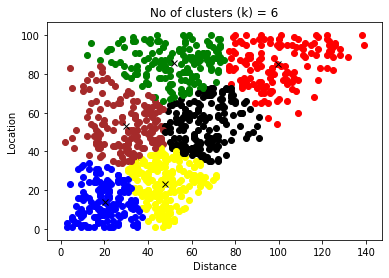

The predictions:
[5 5 1 3 5 3]


In [0]:
#K-means clustering - Mini-Batch-Shuffling
#Build with Sklearn
#Copyright 2018 Denis Rothman MIT License. See LICENSE.
from sklearn.cluster import KMeans  
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
import numpy as np

#I.The training Dataset 
dataseti = pd.read_csv('data.csv')
print (dataseti.head())
print("initial order")
print(dataseti)

print("shuffled")
dataset=shuffle(dataseti, random_state=13)
print(dataset)

n=1000
dataset1=np.zeros(shape=(n,2))
for i in range (n):
    dataset1[i][0]=dataset.iloc[i,0]
    dataset1[i][1]=dataset.iloc[i,1]

print("shuffled selection")
print(dataset1)

#II.Hyperparameters
# Features = 2
k = 6
kmeans = KMeans(n_clusters=k)

#III.K-means clustering algorithm
kmeans = kmeans.fit(dataset1)         #Computing k-means clustering
gcenters = kmeans.cluster_centers_   # the geometric centers or centroids
print("The geometric centers or centroids:")
print(gcenters)

#IV.Defining the Result labels 
labels = kmeans.labels_
colors = ['blue','red','green','black','yellow','brown','orange']

#V.Displaying the results : datapoints and clusters
y = 0
for x in labels:
    plt.scatter(dataset1[y,0], dataset1[y,1],color=colors[x])
    y+=1       
for x in range(k):
    lines = plt.plot(gcenters[x,0],gcenters[x,1],'kx')    

title = ('No of clusters (k) = {}').format(k)
plt.title(title)
plt.xlabel('Distance')
plt.ylabel('Location')
plt.show()

#VI.Test dataset and prediction
x_test = [[40.0,67],[20.0,61],[90.0,90],
          [50.0,54],[20.0,80],[90.0,60]]
prediction = kmeans.predict(x_test)
print("The predictions:")
print (prediction)


K-means

   Distance  location
0        80        53
1        18         8
2        55        38
3        74        74
4        17         4
      Distance  location
0           80        53
1           18         8
2           55        38
3           74        74
4           17         4
...        ...       ...
4994        26        28
4995        50        91
4996        19        32
4997        73        95
4998        36        64

[4999 rows x 2 columns]
The geometric centers or centroids:
[[48.42559524 24.40376984]
 [48.7986755  85.76688742]
 [95.9957204  84.56348074]
 [68.83590963 55.57669441]
 [21.35023041 15.05875576]
 [32.12590799 54.84866828]]


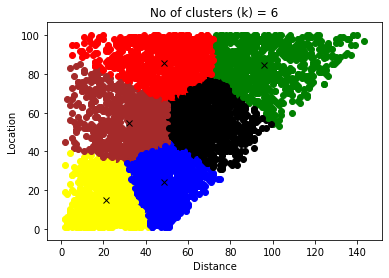

The predictions:
[5 5 2 5 5 3]
model saved


In [0]:
#K-means clustering
#Build with Sklearn
#Copyright 2019 Denis Rothman MIT License. See LICENSE.

from sklearn.cluster import KMeans  
import pandas as pd
from matplotlib import pyplot as plt
import pickle


#I.The training Dataset 
dataset = pd.read_csv('data.csv')
print (dataset.head())
print(dataset)
'''Output of print(dataset)
      Distance  location
0           80        53
1           18         8
2           55        38
...
'''

#II.Hyperparameters
# Features = 2
k = 6
kmeans = KMeans(n_clusters=k)

#III.K-means clustering algorithm
kmeans = kmeans.fit(dataset)         #Computing k-means clustering
gcenters = kmeans.cluster_centers_   # the geometric centers or centroids
print("The geometric centers or centroids:")
print(gcenters)
'''Ouput of centroid coordinates
[[ 48.7986755   85.76688742]
 [ 32.12590799  54.84866828]
 [ 96.06151645  84.57939914]
 [ 68.84578885  55.63226572]
 [ 48.44532803  24.4333996 ]
 [ 21.38965517  15.04597701]]
'''


#IV.Defining the Result labels 
labels = kmeans.labels_
colors = ['blue','red','green','black','yellow','brown','orange']


#V.Displaying the results : datapoints and clusters
y = 0
for x in labels:
    plt.scatter(dataset.iloc[y,0], dataset.iloc[y,1],color=colors[x])
    y+=1       
for x in range(k):
    lines = plt.plot(gcenters[x,0],gcenters[x,1],'kx')    

title = ('No of clusters (k) = {}').format(k)
plt.title(title)
plt.xlabel('Distance')
plt.ylabel('Location')
plt.show()

#VI.Test dataset and prediction
x_test = [[40.0,67],[20.0,61],[90.0,90],
          [50.0,54],[20.0,80],[90.0,60]]
prediction = kmeans.predict(x_test)
print("The predictions:")
print (prediction)
'''
Output of the cluster number of each example
[3 3 2 3 3 4]
'''

# save model
filename="kmc_model.sav"
pickle.dump(kmeans, open(filename, 'wb'))
print("model saved")


Chaining 1

In [0]:
#Chaining a K-means clustering algorithm to a Decision Tree
#Copyright 2019 Denis Rothman MIT License. See LICENSE.
from sklearn.cluster import KMeans  
import pandas as pd
from matplotlib import pyplot as plt
import pickle
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

#----- chained K-means clustering and Decision Tree  
#I.KMC. The prediction dataset and model 
dataset = pd.read_csv('data.csv')
kmeans = pickle.load(open('kmc_model.sav', 'rb'))
   
#saveing the predictions
kmcpred=np.zeros((1000, 3)) 
predict=1
if predict==1:
    for i in range(0,1000):
        xf1=dataset.at[i,'Distance'];xf2=dataset.at[i,'location'];
        X_DL = [[xf1,xf2]]
        prediction = kmeans.predict(X_DL)
        #print (i+1,"The prediction for",X_DL," is:",str(prediction).strip('[]'))
        #print (i+1,"The prediction for",str(X_DL).strip('[]')," is:",str(prediction).strip('[]'))
        p=str(prediction).strip('[]')
        p=int(p)
        kmcpred[i][0]=int(xf1);kmcpred[i][1]=int(xf2);kmcpred[i][2]=p;
np.savetxt('ckmc.csv', kmcpred, delimiter=',', fmt='%d')


Decission tree

   f1  f2  label
0  80  53      3
1  18   8      4
2  55  38      0
3  74  74      3
4  17   4      4
      f1   f2
0     80   53
1     18    8
2     55   38
3     74   74
4     17    4
..   ...  ...
995  103  100
996   71   82
997   50   44
998   62   51
999   67   49

[1000 rows x 2 columns]
0      3
1      4
2      0
3      3
4      4
      ..
995    2
996    1
997    0
998    3
999    3
Name: label, Length: 1000, dtype: int64
prediction
[2 4 0 3 0 2 3 0 2 0 2 0 3 4 1 4 4 0 5 5 0 4 5 5 4 0 3 2 1 0 3 5 3 5 4 1 0
 4 0 4 5 0 3 3 5 1 3 1 5 2 5 1 1 4 0 5 5 5 2 1 4 2 0 3 5 2 1 2 2 5 0 0 3 1
 0 3 3 1 4 2 2 2 2 1 3 3 2 4 5 3 5 3 3 2 1 5 2 3 2 3 1 3 0 0 0 2 1 5 3 4 0
 0 1 0 1 1 4 3 2 0 0 2 2 1 1 2 1 1 1 2 2 2 4 0 0 0 3 2 0 5 1 5 0 4 4 1 1 3
 5 3 5 3 0 4 3 3 1 1 2 3 0 0 5 3 1 0 5 0 4 0 0 0 5 1 4 5 5 0 0 0 5 4 3 4 4
 4 4 3 0 5 0 1 0 4 5 1 1 5 1 5 0 2 3 4 0 1 1 3 4 4 1 0 1 1 0 2 4 1 4 4 3 3
 4 1 5 4 0 0 4 3 4 3 4 1 0 2 2 1 1 3 0 0 3 1 4 2 1 5 4 0 3 3 2 2 3 0 5 1 4
 1 0 2 2 5 1 5 3 2 0 1 5 0 0 0

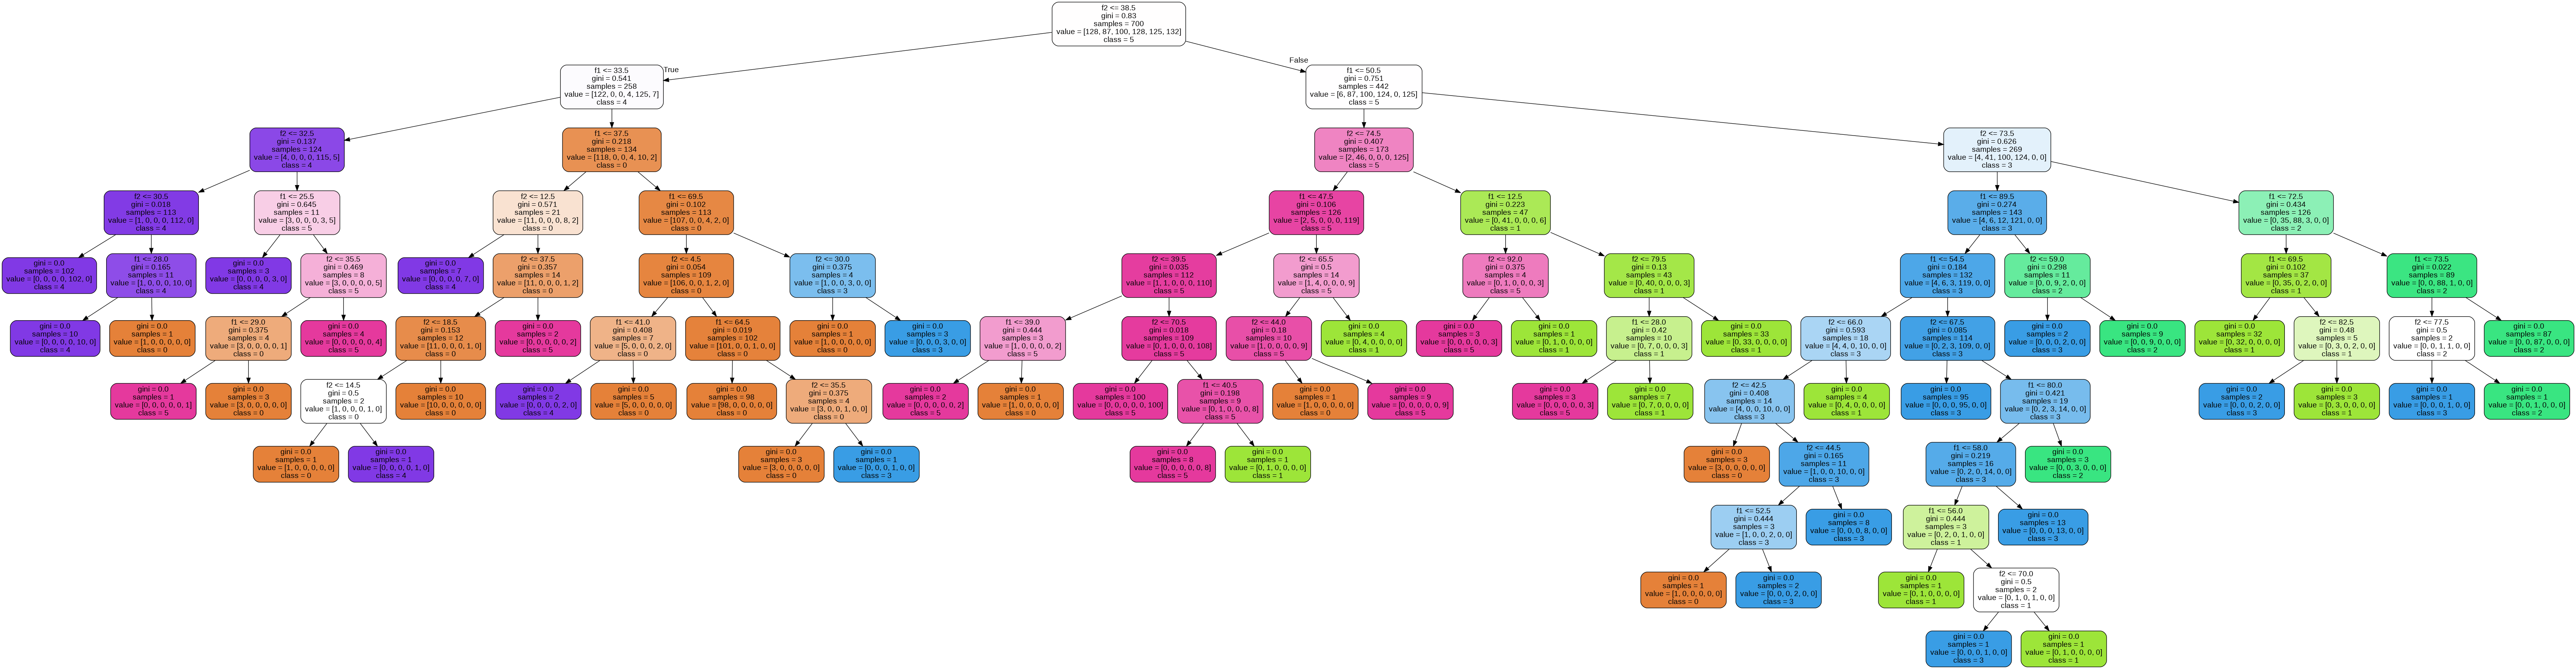

In [0]:
# -*- coding: utf-8 -*-
# Decision Tree Classifier
# Copyright 2019 Denis Rothman MIT License. See LICENSE in GitHub directory.
import pandas as pd #data processing
from sklearn.tree import DecisionTreeClassifier #the dt classifier
from sklearn.model_selection import train_test_split  #split the data into training data and testing data
from sklearn import metrics #measure prediction performance  
import pickle #save and load estimator models

#loading dataset
col_names = ['f1', 'f2','label']
df = pd.read_csv("ckmc.csv", header=None, names=col_names)

print(df.head())

#defining features and label (classes)
feature_cols = ['f1', 'f2']
X = df[feature_cols] # Features
y = df.label # Target variable

print(X)

print(y)

# splitting df (dataset) into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# create the decision tree classifier
dtc = DecisionTreeClassifier()

# train the decision tree
dtc = dtc.fit(X_train,y_train)

#predictions on X_test
print("prediction")
y_pred = dtc.predict(X_test)
print(y_pred)

# model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#save model
pickle.dump(dtc, open("dt.sav", 'wb'))


#Uncomment this part of the code to generate a graph and png
#    set graph=1 to activate the function, graph=0 to deactivate the function
from sklearn import tree
import pydotplus
from IPython.display import Image


# Creating the graph and exporting it
dot_data = tree.export_graphviz(dtc, out_file=None, 
                                filled=True, rounded=True,
                                feature_names=feature_cols,  
                                class_names=['0','1','2','3','4','5'])

#creating graph 
graph = pydotplus.graph_from_dot_data(dot_data)  

#save graph
image=graph.create_png()
graph.write_png("kmc_dt.png")
Image(filename="kmc_dt.png")

KMC Chainning

In [0]:

#II.Decison Tree.
adt=1 #activate decision tree or not
if adt==1:
    #I.DT. The prediction dataset and model 
    col_names = ['f1', 'f2','label']
    # load dataset
    ds = pd.read_csv('ckmc.csv', header=None, names=col_names)

    #split dataset in features and target variable
    feature_cols = ['f1', 'f2']
    X = ds[feature_cols] # Features
    y = ds.label # Target variable

    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

    # Load model
    dt = pickle.load(open('dt.sav', 'rb'))

    #Predict the response for test dataset
    y_pred = dt.predict(X_test)

    # Model Accuracy
    acc=metrics.accuracy_score(y_test, y_pred)
    print("Accuracy:",round(acc,3))


    #Double Check the Model's Accuracy
    doublecheck=1 #0 deactivated, 1 activated 
    if doublecheck==1:
        t=0
        f=0
        for i in range(0,1000):
            xf1=ds.at[i,'f1'];xf2=ds.at[i,'f2'];xclass=ds.at[i,'label']
            X_DL = [[xf1,xf2]]
            prediction =dt.predict(X_DL)
            e=False
            if(prediction==xclass):
                e=True
                t+=1
            if(prediction!=xclass):
                e=False
                f+=1
            print (i+1,"The prediction for",X_DL," is:",str(prediction).strip('[]'),"the class is",xclass,"acc.:",e)

        print("true:",t,"false",f,"accuracy",round(t/(t+f),3))



Accuracy: 0.973
1 The prediction for [[80, 53]]  is: 3 the class is 3 acc.: True
2 The prediction for [[18, 8]]  is: 4 the class is 4 acc.: True
3 The prediction for [[55, 38]]  is: 0 the class is 0 acc.: True
4 The prediction for [[74, 74]]  is: 2 the class is 3 acc.: False
5 The prediction for [[17, 4]]  is: 4 the class is 4 acc.: True
6 The prediction for [[108, 100]]  is: 2 the class is 2 acc.: True
7 The prediction for [[60, 21]]  is: 0 the class is 0 acc.: True
8 The prediction for [[61, 39]]  is: 3 the class is 3 acc.: True
9 The prediction for [[51, 15]]  is: 0 the class is 0 acc.: True
10 The prediction for [[73, 76]]  is: 3 the class is 3 acc.: True
11 The prediction for [[10, 6]]  is: 4 the class is 4 acc.: True
12 The prediction for [[41, 83]]  is: 1 the class is 1 acc.: True
13 The prediction for [[62, 49]]  is: 3 the class is 3 acc.: True
14 The prediction for [[97, 56]]  is: 3 the class is 3 acc.: True
15 The prediction for [[40, 53]]  is: 5 the class is 5 acc.: True
16 

Random Forest

In [0]:
# -*- coding: utf-8 -*-
# Random Forest Classifier
# Copyright 2019 Denis Rothman MIT License. See LICENSE in GitHub directory.
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import pandas as pd
import numpy as np

pp=0 # print information
# load dataset
col_names = ['f1', 'f2','label']
df = pd.read_csv("ckmc.csv", header=None, names=col_names)

if pp==1:
    print(df.head())

#loading features and label (classes)
feature_cols = ['f1', 'f2']
X = df[feature_cols] # Features
y = df.label # Target variable

if pp==1:
    print(X)
    print(y)

#Divide the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Creatng Random Forest Classifier and  training
clf = RandomForestClassifier(n_estimators=25,random_state=None,bootstrap=True)
clf.fit(X_train, y_train)

#Predictions
y_pred = clf.predict(X_test)

if pp==1:
    print("predictions:")
    print(y_pred)

#Metrics
ae=metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:',round(ae,3))


#Double Check the Model's Accuracy
doublecheck=1  # 1=yes, 0=no
if doublecheck==1:
    t=0
    f=0
    for i in range(0,1000):
        xf1=df.at[i,'f1'];xf2=df.at[i,'f2'];xclass=df.at[i,'label']
        X_DL = [[xf1,xf2]]
        prediction =clf.predict(X_DL)
        e=False
        if(prediction==xclass):
            e=True
            t+=1
        if(prediction!=xclass):
            e=False
            f+=1
        if pp==1:
            print (i+1,"The prediction for",X_DL," is:",str(prediction).strip('[]'),"the class is",xclass,"acc.:",e)

    acc=round(t/(t+f),3)
    print("true:",t,"false",f,"accuracy",acc)
    print("Absolute Error",round(1-acc,3))



Mean Absolute Error: 0.15
true: 991 false 9 accuracy 0.991
Absolute Error 0.009
